### Import libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import gcsfs


### Apertura dataset:

In [2]:
prom_final_y_one_hot = pd.read_parquet('gs://gmy/Datasets_ML/ML_Luca/prom_final_y_one_hot.parquet')

In [3]:
prom_final_y_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49128 entries, 0 to 49127
Columns: 262 entries, business_id to stars_volume
dtypes: float64(255), string(7)
memory usage: 98.2 MB


In [4]:
prom_final_y_one_hot.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Hobby Shops,Financial Services,Tours,Towing,Soul Food,Home Cleaning,Fruits & Veggies,Performing Arts,Bridal,stars_volume
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,1280.00,1.116332e-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010407
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,263.25,3.210410e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001768
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,24.00,2.051520e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000231
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.768170,22.50,5.456169e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000330
4,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,TN,46227,39.637133,-86.127217,175.00,8.446150e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002148


### Aplicacion Cosine Similarity:

In [5]:
def cosine_similaritys(random_state_cs):
    # Seleccionar un restaurante aleatorio del conjunto de datos
    restaurante_aleatorio = prom_final_y_one_hot.sample(random_state=random_state_cs)

    # Seleccionar solo las columnas numéricas relevantes para el cálculo de similitud
    columnas_numericas_relevantes = restaurante_aleatorio.select_dtypes(include='number').values

    # Calcular la similitud del coseno con respecto a todos los restaurantes
    similitud_coseno = cosine_similarity(columnas_numericas_relevantes, prom_final_y_one_hot.select_dtypes(include='number'))

    # Obtener los índices de los 10 restaurantes más similares, incluyendo el índice 0
    indices_similares = np.argsort(similitud_coseno[0])[::-1][:10]
    
    
    # Calcular el porcentaje de similitud para los 10 restaurantes más similares
    for i, indice in enumerate(indices_similares):
        similitud = similitud_coseno[0][indice]  # Obtener la similitud del coseno para el restaurante en el índice
        porcentaje_similitud = (similitud * 100).round(2)  # Convertir a porcentaje y redondear a 2 decimales
        print(f"Porcentaje de similitud con restaurante {indice}: {porcentaje_similitud}%")

    
    # Obtener los índices de los restaurantes más similares (top 10)
    indices_10_similares = np.argsort(similitud_coseno[0])[::-1][1:11]  # Tomamos los primeros 10

    # Crear un DataFrame con los 10 restaurantes más similares
    restaurantes_similares = prom_final_y_one_hot.iloc[indices_10_similares]

    # Mostrar el DataFrame con los 10 restaurantes más similares
    print("Restaurantes Más Similares (Top 10):")
    print(restaurantes_similares[['name','state','city','address','promedio_sentimientos_positivos','promedio_sentimientos_negativos','stars']])
    print("Restaurante aleatorio seleccionado:")
    print(restaurante_aleatorio[['name','state','city','address','promedio_sentimientos_positivos','promedio_sentimientos_negativos','stars']].head())

    # Prepare the output for the top 10 similar restaurants
    top_10_similar_restaurants_output = f"Restaurantes Más Similares (Top 10):\n{restaurantes_similares[['name','state','city','address','promedio_sentimientos_positivos','promedio_sentimientos_negativos','stars']].to_string(index=False)}"

    # Prepare the output for the randomly selected restaurant
    random_restaurant_output = f"\nRestaurante aleatorio seleccionado:\n{restaurante_aleatorio[['name','state','city','address','promedio_sentimientos_positivos','promedio_sentimientos_negativos','stars']].head().to_string(index=False)}"

    # Combine both outputs
    combined_output = top_10_similar_restaurants_output + random_restaurant_output

    return combined_output

cosine_similaritys(42)



Porcentaje de similitud con restaurante 31779: 100.0%
Porcentaje de similitud con restaurante 43291: 100.0%
Porcentaje de similitud con restaurante 19502: 100.0%
Porcentaje de similitud con restaurante 5600: 100.0%
Porcentaje de similitud con restaurante 48381: 100.0%
Porcentaje de similitud con restaurante 1170: 100.0%
Porcentaje de similitud con restaurante 9249: 100.0%
Porcentaje de similitud con restaurante 45828: 100.0%
Porcentaje de similitud con restaurante 1302: 100.0%
Porcentaje de similitud con restaurante 29655: 100.0%
Restaurantes Más Similares (Top 10):
                                   name state              city  \
43291                    Domino's Pizza    NV           Brandon   
19502                           Wendy's    FL     Wesley Chapel   
5600                       Cici's Pizza    CA             Tampa   
48381             Moe's Southwest Grill    NJ     Land O' Lakes   
1170                        Dragon City    TN           Brandon   
9249                    F

"Restaurantes Más Similares (Top 10):\n                            name state             city                  address  promedio_sentimientos_positivos  promedio_sentimientos_negativos  stars\n                  Domino's Pizza    NV          Brandon      1903 W Brandon Blvd                         0.001024                         0.010343 156.25\n                         Wendy's    FL    Wesley Chapel 28031 Wesley Chapel Blvd                         0.001153                         0.009220 156.25\n                    Cici's Pizza    CA            Tampa         3910 Britton Plz                         0.001450                         0.006649 156.25\n           Moe's Southwest Grill    NJ    Land O' Lakes        2087 Collier Pkwy                         0.001416                         0.011708 156.00\n                     Dragon City    TN          Brandon   801 E Bloomingdale Ave                         0.000976                         0.010757 156.25\n                 Franks and Sub

In [6]:
# Calcular el porcentaje de similitud para los 10 restaurantes más similares
for i, indice in enumerate(indices_similares):
    similitud = similitud_coseno[0][indice]  # Obtener la similitud del coseno para el restaurante en el índice
    porcentaje_similitud = (similitud * 100).round(2)  # Convertir a porcentaje y redondear a 2 decimales
    print(f"Porcentaje de similitud con restaurante {indice}: {porcentaje_similitud}%")


NameError: name 'indices_similares' is not defined

### Crear un DataFrame con los 10 restaurantes más similares
*Analiza competencia de los 10 mas similares....*

In [ ]:
# Obtener los índices de los restaurantes más similares (top 10)
indices_10_similares = np.argsort(similitud_coseno[0])[::-1][1:11]  # Tomamos los primeros 10

# Crear un DataFrame con los 10 restaurantes más similares
restaurantes_similares = prom_final_y_one_hot.iloc[indices_10_similares]

# Mostrar el DataFrame con los 10 restaurantes más similares
print("Restaurantes Más Similares (Top 10):")
print(restaurantes_similares)


In [ ]:
restaurantes_similares.head(11)

In [ ]:
restaurante_aleatorio.head()

### Metodo Ridge

### METODO RIDGE: EL QUE MEJORES RESULTADOS OBTUVO...

In [ ]:
# def metodo_ridge(random_state_user):
#     set = pd.DataFrame()
#     random_state = int()
#     ## Modelo:

#     # Preprocesamiento de datos
#     set = prom_final_y_one_hot.drop(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'BusinessParking'], axis=1, inplace=True)

#     # Separar datos
#     X = set.drop('stars_volume', axis=1)
#     y = set['stars_volume']

#     # Dividir datos en conjuntos de entrenamiento y prueba
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_user)

#     # Entrenar el modelo con regularización Ridge
#     ridge_model = Ridge(alpha=0.1)  # Alpha controla la fuerza de la regularización
#     ridge_model.fit(X_train, y_train)

#     # Evaluar el modelo
#     y_pred_ridge = ridge_model.predict(X_test)
#     mse_ridge = mean_squared_error(y_test, y_pred_ridge)
#     mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
#     r2_ridge = r2_score(y_test, y_pred_ridge)
#     explained_var_ridge = explained_variance_score(y_test, y_pred_ridge)

#     # Imprimir métricas de evaluación con regularización Ridge
#     print('Ridge Regression:')
#     print('Mean Squared Error:', mse_ridge)
#     print('Mean Absolute Error:', mae_ridge)
#     print('R-squared:', r2_ridge)
#     print('Explained Variance Score:', explained_var_ridge)
    
    
#     ## Grafica:
    
#     # Obtener los nombres de las características
#     feature_names = X.columns

#     # Obtener los coeficientes del modelo Ridge
#     coefs = ridge_model.coef_

#     # Obtener los nombres de las características
#     feature_names = X.columns

#     # Obtener los coeficientes y nombres de las top 25 características
#     top_25_coefs = coefs.argsort()[-25:]
#     top_25_feature_names = feature_names[top_25_coefs]

#     # Obtener los coeficientes correspondientes a las top 25 características
#     top_25_coefs = coefs[top_25_coefs]

#     # Visualizar los coeficientes de las top 25 características
#     plt.figure(figsize=(12, 8))
#     plt.bar(range(len(top_25_coefs)), top_25_coefs)
#     plt.xlabel('Característica')
#     plt.ylabel('Coeficiente')
#     plt.title('Coeficientes del Modelo Ridge para las Top 25 Características')
#     plt.xticks(range(len(top_25_coefs)), top_25_feature_names, rotation=90)
#     plt.tight_layout()
#     plt.show()
    
    
    
#     return {
#         ('Ridge Regression:')
#         ('Mean Squared Error:', mse_ridge)
#         ('Mean Absolute Error:', mae_ridge)
#         ('R-squared:', r2_ridge)
#         ('Explained Variance Score:', explained_var_ridge)
       
#     }

# metodo_ridge(23)

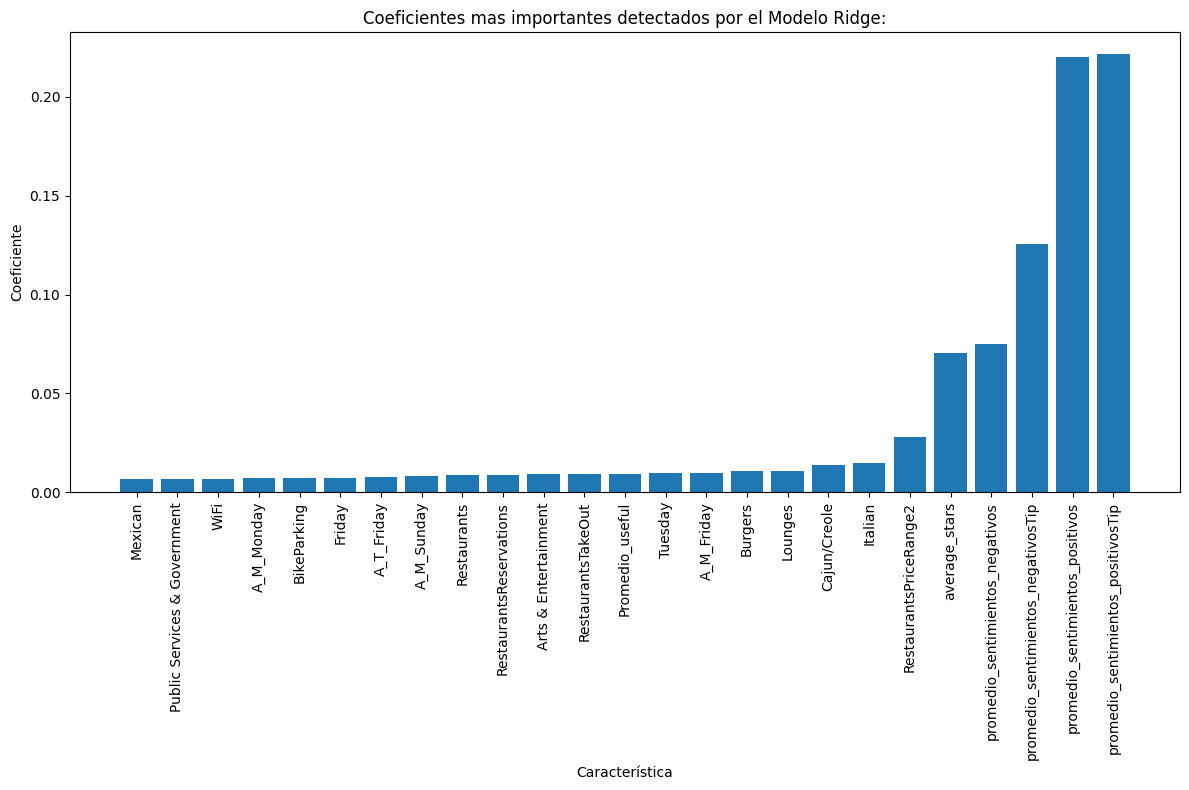

{'Ridge Regression': {'Mean Squared Error': 4.2807074108029315e-07, 'Mean Absolute Error': 0.0002449321807053596, 'R-squared': 0.9994553636788541, 'Explained Variance Score': 0.9994553637968575}}


In [7]:
def metodo_ridge(random_state_user):
        
    set = prom_final_y_one_hot
    
    ## Modelo:
    
    set = prom_final_y_one_hot.drop(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'BusinessParking'], axis=1)
    
    # Separar datos
    X = set.drop('stars_volume', axis=1)
    y = set['stars_volume']
    
    # Dividir datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_user)
    
    # Entrenar el modelo con regularización Ridge
    ridge_model = Ridge(alpha=0.1)  # Alpha controla la fuerza de la regularización
    ridge_model.fit(X_train, y_train)
    
    # Evaluar el modelo
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)
    explained_var_ridge = explained_variance_score(y_test, y_pred_ridge)
    
    ## Grafica:
    
    # Obtener los nombres de las características
    feature_names = X.columns
    
    # Obtener los coeficientes del modelo Ridge
    coefs = ridge_model.coef_
    
    # Obtener los coeficientes y nombres de las top 25 características
    top_25_coefs = coefs.argsort()[-25:]
    top_25_feature_names = feature_names[top_25_coefs]
    
    # Obtener los coeficientes correspondientes a las top 25 características
    top_25_coefs = coefs[top_25_coefs]
    
    # Visualizar los coeficientes de las top 25 características
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(top_25_coefs)), top_25_coefs)
    plt.xlabel('Característica')
    plt.ylabel('Coeficiente')
    plt.title('Coeficientes mas importantes detectados por el Modelo Ridge:')
    plt.xticks(range(len(top_25_coefs)), top_25_feature_names, rotation=90)
    plt.tight_layout()
    plt.show()
    
    return {
        'Ridge Regression': {
            'Mean Squared Error': mse_ridge,
            'Mean Absolute Error': mae_ridge,
            'R-squared': r2_ridge,
            'Explained Variance Score': explained_var_ridge
        }
    }

# Example usage
result = metodo_ridge(23)
print(result)


### Prueba:

Este grafico muestra aquellas variables que mayor peso tienen en relacion con el volumen de estrellas que termina teniendo un negocio.

_______________________________________________________________________